## In this code, we are going to implement a basic image classifier:
  - Load the dataset (MNIST hand written digits)
  - Design a deep learning model and inspect its learnable parameters
  - Train the model on the training data and inspect learning curves
  - Evaluate the trained model on the never seen testing data
  - Save the model for later use
  - Load and use the model


In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import plot_model
from PIL import Image
from keras import backend as K
import matplotlib.pyplot as plt

batch_size = 128
num_classes = 10
epochs = 10 #50

# input image dimensions
img_rows, img_cols = 28, 28

## Load the data

![MNIST](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

In [2]:
# load data, split into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# small data
data_size = 10000
x_train = x_train[:data_size]
y_train = y_train[:data_size]
x_test = x_test[:data_size]
y_test = y_test[:data_size]

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (10000, 28, 28, 1)
10000 train samples
10000 test samples


## Build the DNN model

In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

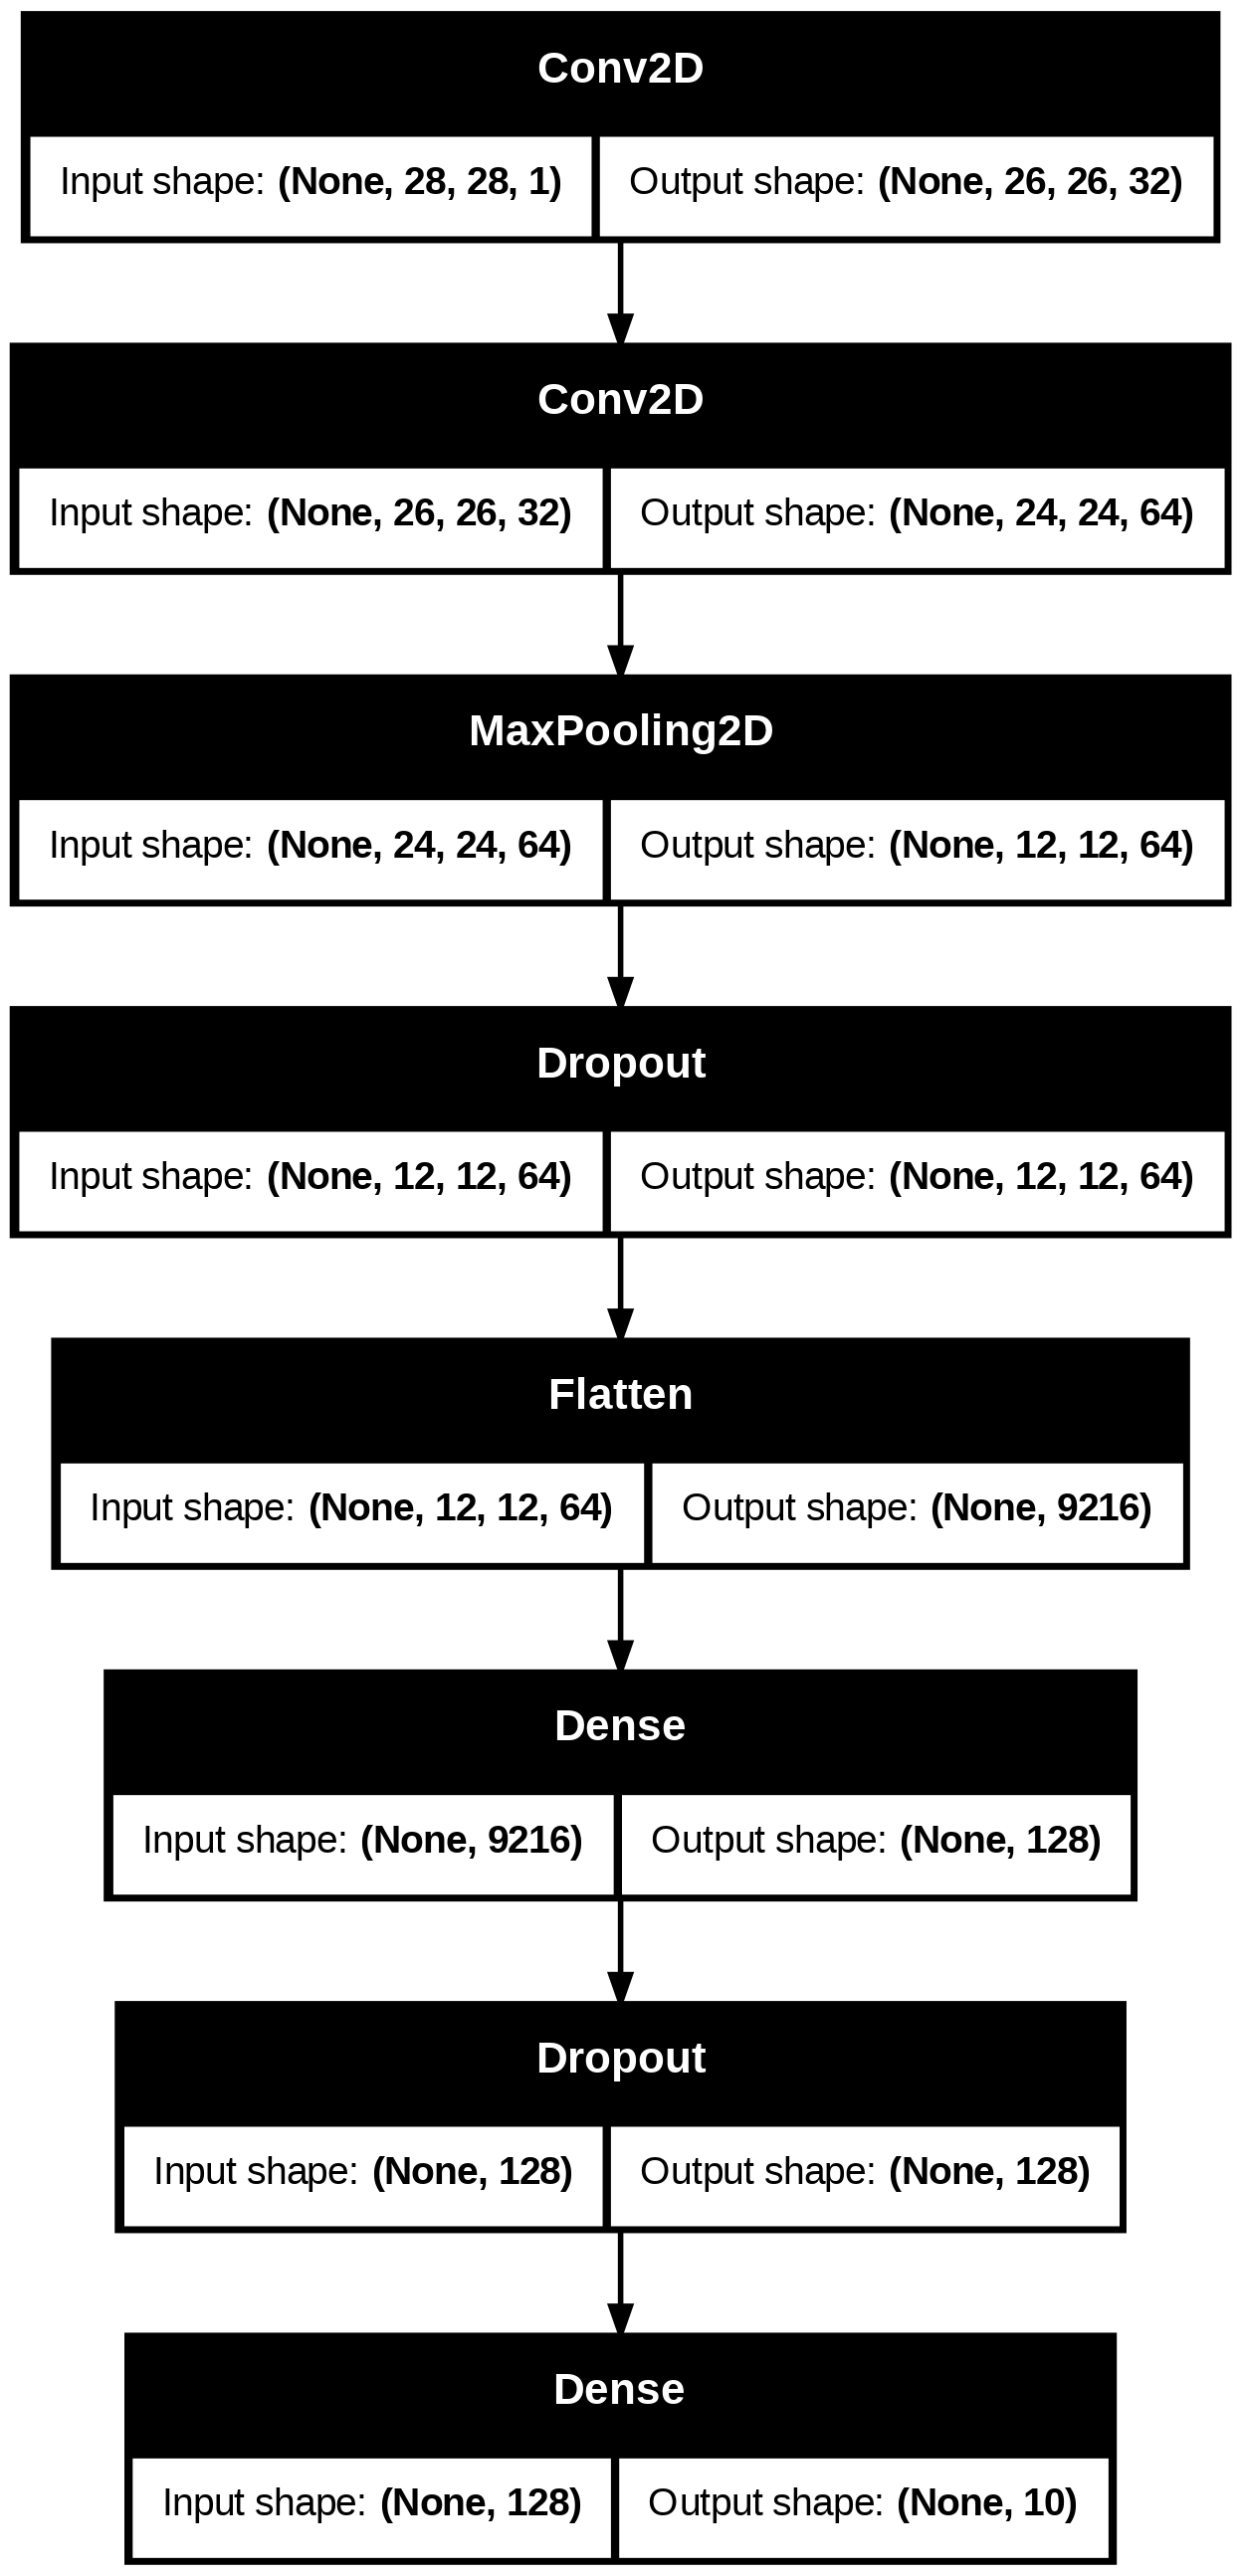

In [4]:
plot_model(model, to_file="mnistcnn.png", show_shapes=True)
img = Image.open('./mnistcnn.png')
img

## Train the model

In [5]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.1218 - loss: 2.3026 - val_accuracy: 0.1699 - val_loss: 2.2820
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1443 - loss: 2.2877 - val_accuracy: 0.1871 - val_loss: 2.2671
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1615 - loss: 2.2714 - val_accuracy: 0.2054 - val_loss: 2.2517
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1841 - loss: 2.2549 - val_accuracy: 0.2375 - val_loss: 2.2360
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1892 - loss: 2.2470 - val_accuracy: 0.2915 - val_loss: 2.2206
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2205 - loss: 2.2272 - val_accuracy: 0.3475 - val_loss: 2.2049
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.2415 - loss: 2.2136 - val_accuracy: 0.4032 - val_loss: 2.1888
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2680 - loss: 2.1956 - val_accuracy: 0.4436 - 

## Evalaute the model

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.137284278869629
Test accuracy: 0.5077999830245972


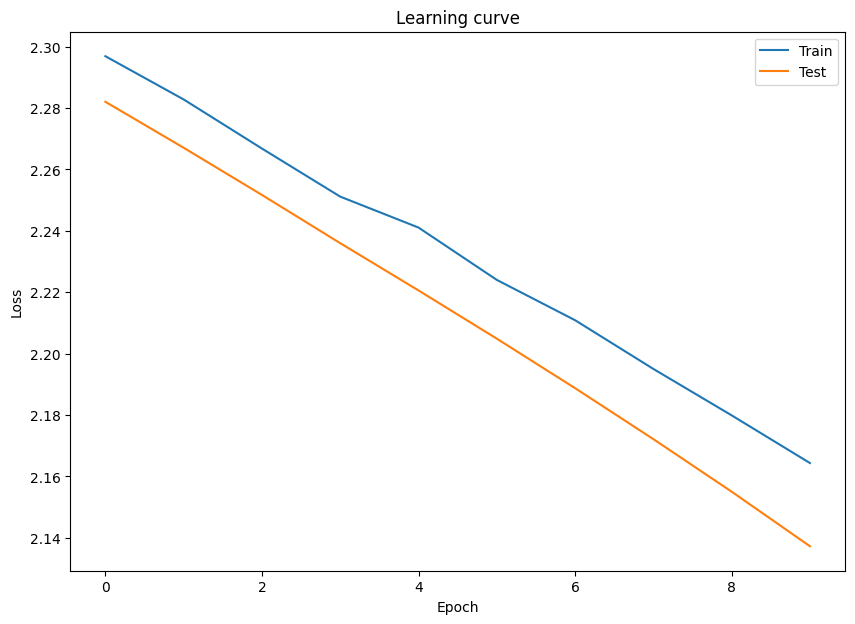

In [7]:
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')


plt.title('Learning curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend()

## Save and load the trained model

In [8]:
from keras.models import load_model
# save the model
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

In [9]:
!ls -l

total 14256
-rw-r--r-- 1 root root   150081 Aug 10 08:24 mnistcnn.png
-rw-r--r-- 1 root root 14442432 Aug 10 08:26 my_model.h5
drwxr-xr-x 1 root root     4096 Aug  7 13:42 sample_data


In [10]:
# load the saved model
myloadednewmodel = load_model('my_model.h5')

In [11]:
myloadednewmodel.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.137284278869629
Test accuracy: 0.5077999830245972
